<a href="https://colab.research.google.com/github/Simpleshell3/CMR-Land-Sector-Analysis/blob/main/North_Cameroon_Land_Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing packages
!pip install geopandas 
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install mapclassify
!pip install geoplot
!pip install seaborn
!pip install rasterio
!pip install folium
!pip install ipyleaflet

In [2]:
#Importing packages
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import mapclassify
from mpl_toolkits.basemap import Basemap
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import seaborn as sns
import io
import requests
import rasterio
from rasterio.plot import show
import folium

%matplotlib inline

In [3]:
# Downloading and displaying North Cameroon's Adminitrative Boundaries
url1 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_North.json"

a=requests.get(url1).content

df_ncbo = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ncbo

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,CMR,CM-NO,North,North,Nord,,administrative,4,Q502341,fr:Région du Nord (Cameroun),2019-02-26T08:00:07,"POLYGON ((12.24380 8.38656, 12.24625 8.36778, ..."


In [4]:
m = folium.Map(
    location=[4, 14],
    tiles="cartodbpositron",
    zoom_start=7,
)

folium.GeoJson(url1, name="adminlevel").add_to(m)

folium.LayerControl().add_to(m)

m

In [5]:
# Downloading and displaying North Cameroon's Ecological Zones
url2 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_North_GEZ.json"

a=requests.get(url2).content

df_ncgez = gpd.read_file(io.StringIO(a.decode('utf-8')))

df_ncgez

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM-NO,North,Tropical dry forest,13,TAwb,4,"POLYGON ((14.20574 9.99888, 14.20615 10.04953,..."
1,CMR,CM-NO,North,Tropical moist forest,12,TAwa,4,"POLYGON ((14.57217 9.00976, 14.56491 9.00690, ..."


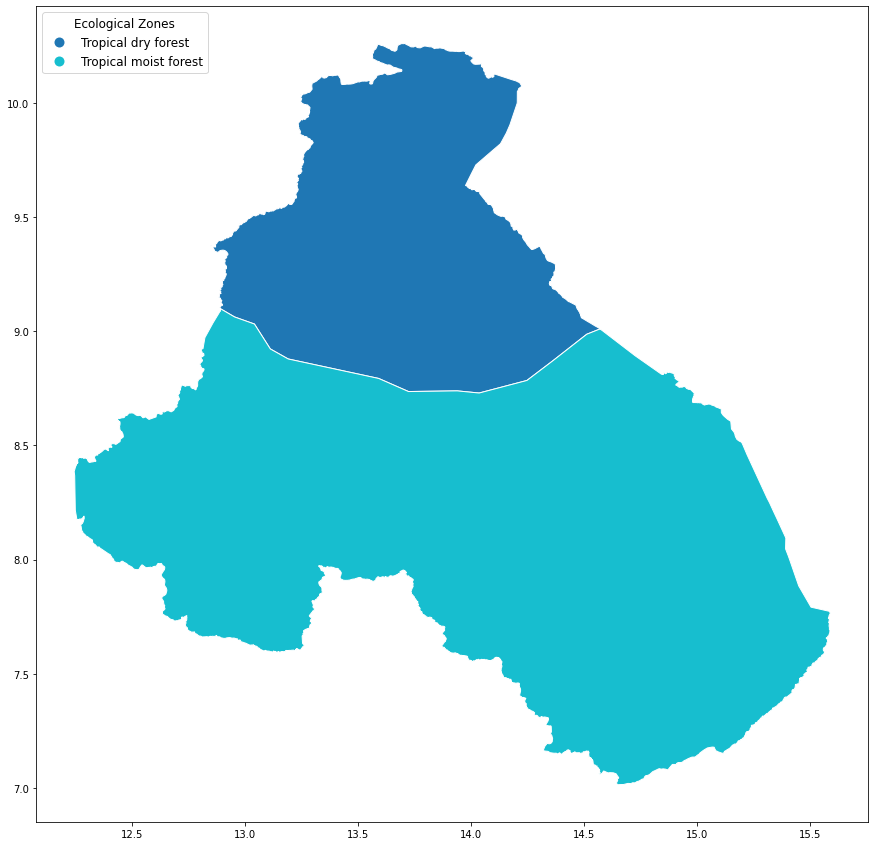

In [6]:
df_ncgez.plot(figsize= (15,15), column='gez_name', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Ecological Zones", "title_fontsize":"large"})
plt.show()

In [7]:
# Downloading and displaying North Cameroon's Soil Resources
url3 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_North_WSR.json"

a=requests.get(url3).content

df_ncwsr = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ncwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,CMR,CM-NO,North,LX,6,Lixisol,4,"MULTIPOLYGON (((13.64031 10.23639, 13.63853 10..."
1,CMR,CM-NO,North,VR,5,Vertisol,4,"POLYGON ((14.20574 9.99888, 14.20615 10.04953,..."


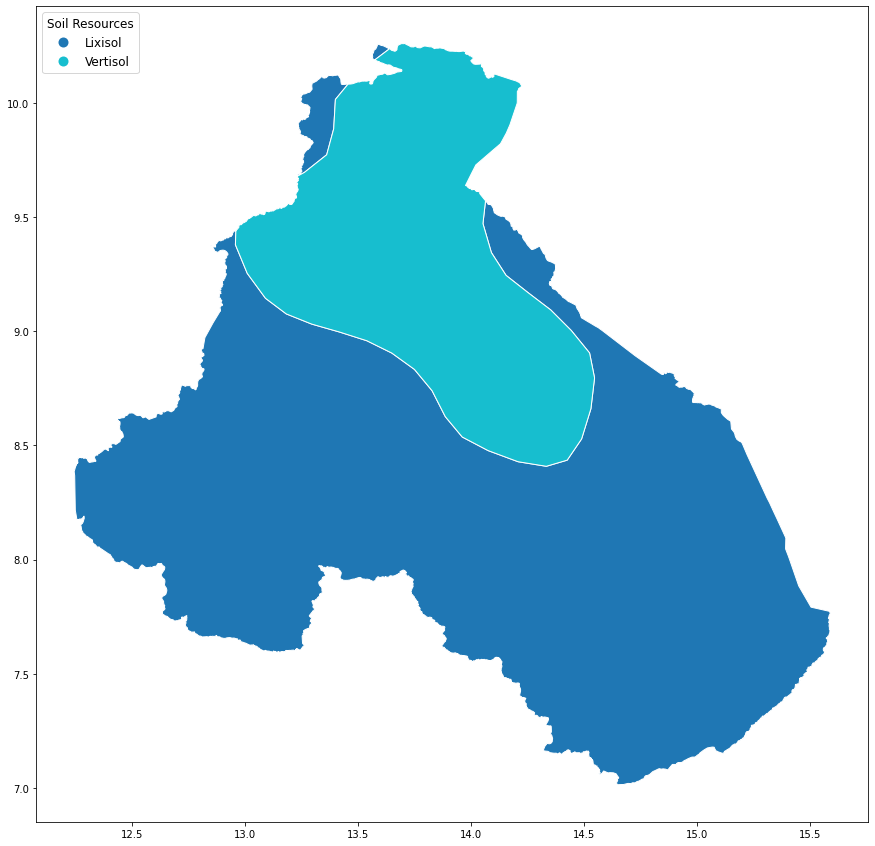

In [8]:
df_ncwsr.plot(figsize= (15,15), column='IPCC', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Soil Resources", "title_fontsize":"large"})
plt.show()